In [1]:
from dataclasses import dataclass, field
from random import shuffle
from typing import Literal

import h5py
import henon_map_cpp as hm
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
from numba import njit
from tqdm import tqdm

from config_standard import (CoordinateConfig, HenonConfig, OutputConfig,
                             TrackingConfig)

from postprocessings import compute_RE

In [10]:
coords = CoordinateConfig(
    coord1="x",
    coord2="y",
    coord1_min=0.0,
    coord1_max=0.25,
    coord2_min=0.0,
    coord2_max=0.25,
    samples_per_side=100)

henon = HenonConfig(
    omega_x=0.31,
    omega_y=0.32,
    epsilon=0.0,
    mu=0.0)

tracking = TrackingConfig(
    max_iterations=1000,
    n_samples=1000,
    sampling_method="all",
    analysis_type="tangent_map")


In [11]:
o_coordinates = OutputConfig(
    path="/home/HPC/camontan/turchetti_paper/output",
    basename="coordinates")

In [12]:
o_rem = OutputConfig(
    path="/home/HPC/camontan/turchetti_paper/output",
    basename="rem")

In [13]:
o_stability = OutputConfig(
    path="/home/HPC/camontan/turchetti_paper/output",
    basename="stability")

In [14]:
o_tangent_stuff = OutputConfig(
    path="/home/HPC/camontan/turchetti_paper/output",
    basename="tangent_stuff")

In [15]:
o_tangent_raw = OutputConfig(
    path="/home/HPC/camontan/turchetti_paper/output",
    basename="tangent_raw")

In [16]:
re_values = compute_RE(coords, henon, tracking, o_tangent_raw)

100%|██████████| 1000/1000 [29:03<00:00,  1.74s/it]


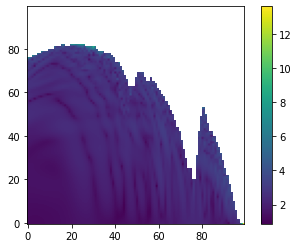

In [20]:
plt.imshow(np.log10(re_values[-1]).reshape(100, 100), origin="lower")
plt.colorbar()

In [8]:
from postprocessings import compute_MEGNO


megno_values = compute_MEGNO(coords, henon, tracking, o_tangent_raw)

100%|██████████| 9999/9999 [00:02<00:00, 3790.10it/s]


In [9]:
megno_values = np.asarray(megno_values)

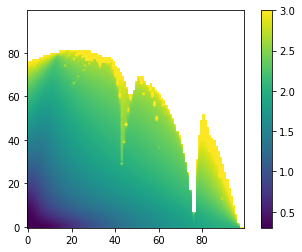

In [12]:
plt.imshow(np.log10(megno_values[-500]).reshape(100, 100), origin="lower", vmax=3)
plt.colorbar()

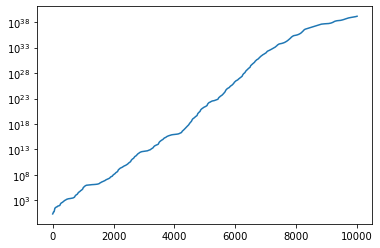

In [11]:
plt.plot(megno_values[:,7600])
plt.yscale("log")

In [8]:
from postprocessings import frequency_map_analysis

fma_tracking = TrackingConfig(
    max_iterations=10000,
    n_samples=2,
    sampling_method="linear",
    analysis_type="tangent_map")

fma = frequency_map_analysis(coords, henon, fma_tracking, o_coordinates)

100%|██████████| 10000/10000 [00:18<00:00, 544.13it/s]


In [10]:
fma.shape

(2, 10000)

/tmp/ipykernel_3537/334663308.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(fma[-1]).reshape(100, 100), origin="lower")


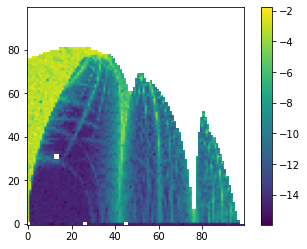

In [14]:
plt.imshow(np.log10(fma[-1]).reshape(100, 100), origin="lower")
plt.colorbar()

In [15]:
f = h5py.File("/home/HPC/camontan/turchetti_paper/output/stability.h5", "r")

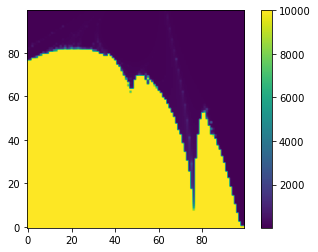

In [18]:
plt.imshow(f["stability"][:].reshape(100, 100), origin="lower")
plt.colorbar()